# Collect data

In [2]:
from pathlib import Path
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def build_dataset(p):
    dfs = []
    for folder in p.glob('*'):
        for file in folder.glob('*.csv'):
            dfs.append(pd.read_csv(file))
            dfs[-1]['Seed'] = int(re.findall(r'\d+', file.name)[0])

    df = pd.concat(dfs)
    df['Loglr'] = df['Learning rate'].apply(lambda x: np.log10(x))

    activation_dict = {
        'activation.identity': "",
        'activation.relu': "ReLU",
        'activation.leaky_relu': "LeakyReLU",
        'activation.sigmoid': "Sigmoid",
        'activation.dmelu': "DiLU"
    }

    model_dict = {
        "model_type.hyperbolic" : "Cartan",
        "model_type.euclidean" : "Euclidean",
        "model_type.eubn" : "Eucl + BN",
        "model_type.poincare" : "Poincare",
        "model_type.lorentz" : "Lorentz"
    }

    df['Model'] = df['Model'].apply(lambda x: model_dict[x])
    df['Activation'] = df['Activation'].apply(lambda x: activation_dict[x])
    df['Type'] = df['Model'] + ' - ' + df['Activation']

    return df

# Image

In [3]:
kmnist = build_dataset(Path('../data/kmnist/kmnist'))
cifar = build_dataset(Path('../data/cifar/cifar10'))

In [4]:
def kmnistplot(ax):
    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    fig = plt.figure(figsize=[15, 7.5])
    ax.set_title(f'a) KMNIST performance')

    palettes = [
        sns.cubehelix_palette(start=0, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=0.75, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=1.5, rot=0.2, dark=0.5, light=0.5, as_cmap=True), 
        
    ]
    for nneurons, palette in zip([20, 40,100], palettes):
        df=kmnist[kmnist['Neurons'] == nneurons]
        df['Type'] = df['Model'] + '_' + df['Activation']
        df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
        plt.rc('font', size=19)
        plt.rc('legend', fontsize=12)
        ax = sns.boxplot(data=df.groupby(['Model', 'Activation', 'Nlayers', 'Seed', 'Type'], as_index=False).apply(max),
                        x='Type', y='Test accuracy', hue='Nlayers', fill=False, ax=ax, palette=palette,
                        order=['Euclidean DiLU', 'Cartan DiLU', 'Poincare DiLU', 'Cartan '])
        

    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.plot([-0.35,-0.35, 0.35, 0.35], [0.7675, 0.7625, 0.7625, 0.7675], color='black')

    ax.annotate("1", (-0.35, 0.77125), ha='center')
    ax.annotate("7", (0.35, 0.77125), ha='center')
    ax.annotate("# Hidden Layers", (-0.025, 0.7525), ha='center', fontsize=15)

    bx = -0.66125
    ix = -0.05
    y1 = 0.81
    y2 = 0.85
    y3 = 0.89
    ax.plot([bx - ix] + [bx]*2 + [bx-ix] + [bx]*2 + [bx-ix], [y1]*2 + [y2]*3  + [y3]*2, color='black')
    ax.annotate("20", (bx-4*ix, y1-0.0025), ha='right', fontsize=14)
    ax.annotate("40", (bx-4*ix, y2-0.0025), ha='right', fontsize=14)
    ax.annotate("100", (bx-4*ix+0.03, y3-0.0025), ha='right', fontsize=14)
    ax.annotate("# Neurons", (bx + 2*ix, (y1+y2)/2), ha='center', fontsize=15, rotation=90)


    ax.tick_params(axis='x', labelsize=19, bottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return ax.get_yticks(), [item.get_text() for item in ax.get_yticklabels()]

def cifarplot(ax):
    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    ax.set_title(f'b) CIFAR10 performance')

    palettes = [
        sns.cubehelix_palette(start=0, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=0.75, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=1.5, rot=0.2, dark=0.5, light=0.5, as_cmap=True), 
        
    ]
    for nneurons, palette in zip([20, 40,100], palettes):
        df=cifar[cifar['Neurons'] == nneurons]
        df['Type'] = df['Model'] + '_' + df['Activation']
        df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
        plt.rc('font', size=19)
        plt.rc('legend', fontsize=12)
        ax = sns.boxplot(data=df.groupby(['Model', 'Activation', 'Nlayers', 'Seed', 'Type'], as_index=False).apply(max),
                        x='Type', y='Test accuracy', hue='Nlayers', fill=False, ax=ax, palette=palette,
                        order=['Euclidean DiLU', 'Cartan DiLU', 'Poincare DiLU', 'Cartan '])
        

    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    import matplotlib.patches as mpatches
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.plot([-0.35,-0.35, 0.35, 0.35], [0.4525, 0.4475, 0.4475, 0.4525], color='black')

    ax.annotate("1", (-0.35, 0.4525+0.002625), ha='center')
    ax.annotate("5", (0.35, 0.4525+0.002625), ha='center')
    ax.annotate("# Hidden Layers", (-0.025, 0.4425), ha='center', fontsize=15)


    ax.tick_params(axis='x', labelsize=19, bottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    return ax.get_yticks(), [item.get_text() for item in ax.get_yticklabels()]


/tmp/ipykernel_873745/3851555544.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Model'] + '_' + df['Activation']
/tmp/ipykernel_873745/3851555544.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
/tmp/ipykernel_873745/3851555544.py:20: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep cur

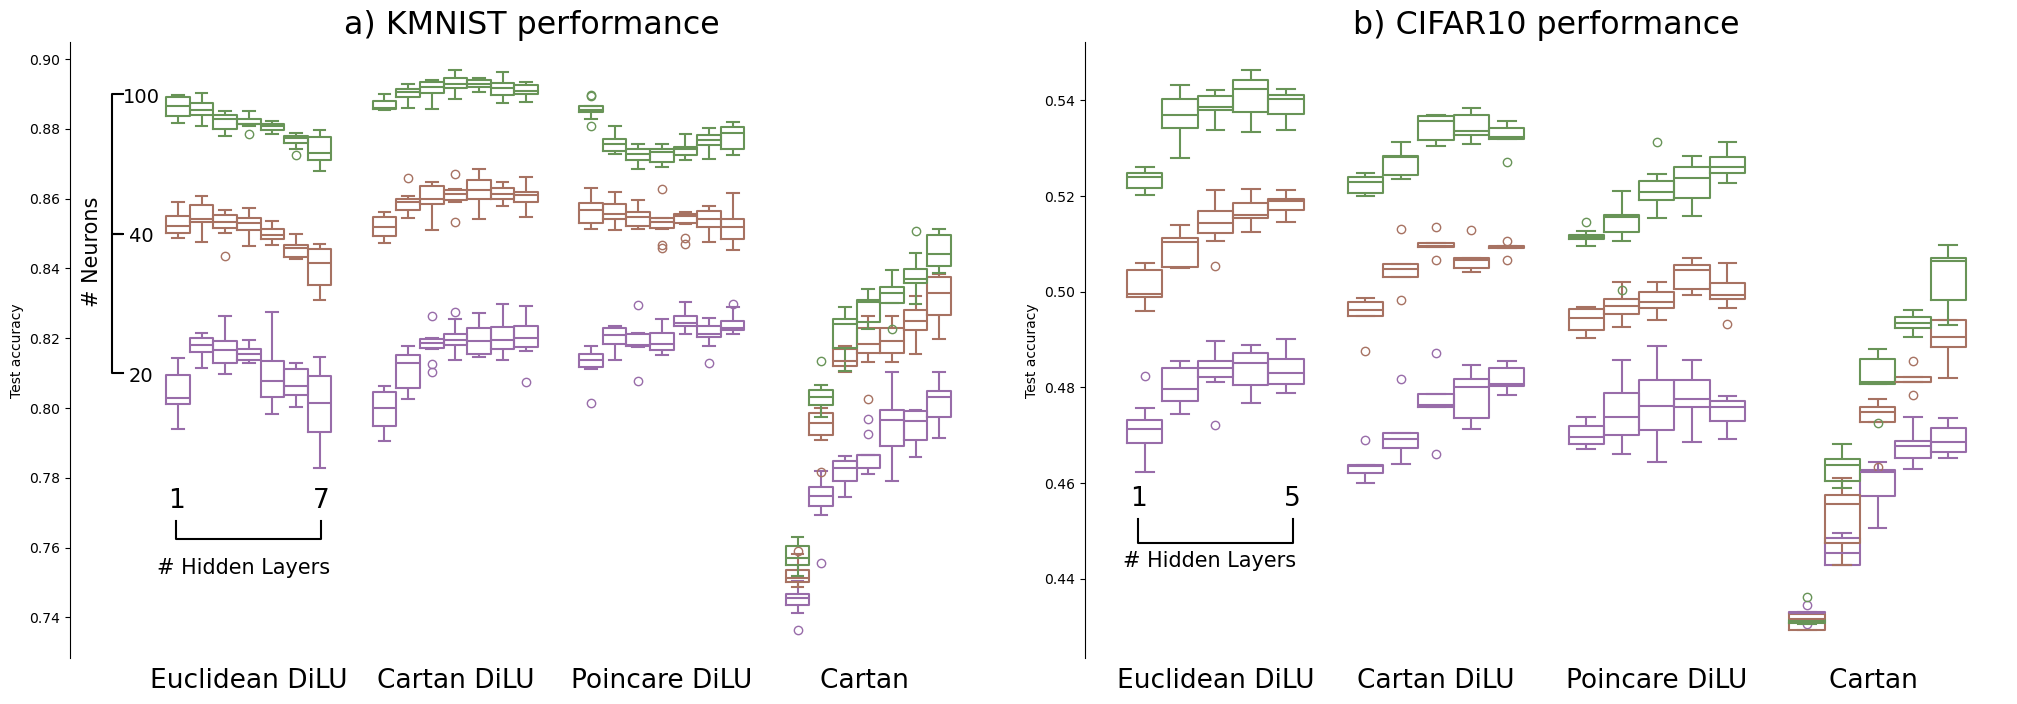

<Figure size 1500x750 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(25,8), gridspec_kw={'wspace': 0.1})

kmnist_ticks, kmnist_labels = kmnistplot(ax1)
cifar_ticks, cifar_labels = cifarplot(ax2)


ylim = ax1.get_ylim()

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()


fig.savefig('images/overall_comparison.svg', format='svg', dpi = 500, bbox_inches='tight')
fig.savefig('images/overall_comparison.jpeg', format='jpeg', dpi = 500, bbox_inches='tight')

# Supplementary

In [6]:
mnist = build_dataset(Path('../data/mnist/'))
fmnist = build_dataset(Path('../data/fmnist/'))

In [7]:
def mnistplot(ax):
    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    fig = plt.figure(figsize=[15, 7.5])
    ax.set_title(f'c) MNIST performance')

    palettes = [
        sns.cubehelix_palette(start=0, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=0.75, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=1.5, rot=0.2, dark=0.5, light=0.5, as_cmap=True), 
        
    ]
    for nneurons, palette in zip([20, 40,100], palettes):
        df=mnist[mnist['Neurons'] == nneurons]
        df['Type'] = df['Model'] + '_' + df['Activation']
        df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
        plt.rc('font', size=19)
        plt.rc('legend', fontsize=12)
        ax = sns.boxplot(data=df.groupby(['Model', 'Activation', 'Nlayers', 'Seed', 'Type'], as_index=False).apply(max),
                        x='Type', y='Test accuracy', hue='Nlayers', fill=False, ax=ax, palette=palette,
                        order=['Euclidean DiLU', 'Cartan DiLU', 'Poincare DiLU', 'Cartan '])
        

    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    ax.get_legend().remove()
    ax.set_xlabel('')
    #ax.plot([-0.35,-0.35, 0.35, 0.35], [0.7675, 0.7625, 0.7625, 0.7675], color='black')

    #ax.annotate("1", (-0.35, 0.77125), ha='center')
    #ax.annotate("7", (0.35, 0.77125), ha='center')
    #ax.annotate("# Hidden Layers", (-0.025, 0.7525), ha='center', fontsize=15)

    bx = -0.66125
    ix = -0.05
    y1 = 0.81
    y2 = 0.85
    y3 = 0.89
    #ax.plot([bx - ix] + [bx]*2 + [bx-ix] + [bx]*2 + [bx-ix], [y1]*2 + [y2]*3  + [y3]*2, color='black')
    #ax.annotate("20", (bx-4*ix, y1-0.0025), ha='right', fontsize=14)
    #ax.annotate("40", (bx-4*ix, y2-0.0025), ha='right', fontsize=14)
    #ax.annotate("100", (bx-4*ix+0.03, y3-0.0025), ha='right', fontsize=14)
    #ax.annotate("# Neurons", (bx + 2*ix, (y1+y2)/2), ha='center', fontsize=15, rotation=90)


    ax.tick_params(axis='x', labelsize=19, bottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return ax.get_yticks(), [item.get_text() for item in ax.get_yticklabels()]

def fmnistplot(ax):
    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    ax.set_title(f'd) fMNIST performance')

    palettes = [
        sns.cubehelix_palette(start=0, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=0.75, rot=0.2, dark=0.5, light=0.5, as_cmap=True),
        sns.cubehelix_palette(start=1.5, rot=0.2, dark=0.5, light=0.5, as_cmap=True), 
        
    ]
    for nneurons, palette in zip([20, 40,100], palettes):
        df=fmnist[fmnist['Neurons'] == nneurons]
        df['Type'] = df['Model'] + '_' + df['Activation']
        df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
        plt.rc('font', size=19)
        plt.rc('legend', fontsize=12)
        ax = sns.boxplot(data=df.groupby(['Model', 'Activation', 'Nlayers', 'Seed', 'Type'], as_index=False).apply(max),
                        x='Type', y='Test accuracy', hue='Nlayers', fill=False, ax=ax, palette=palette,
                        order=['Euclidean DiLU', 'Cartan DiLU', 'Poincare DiLU', 'Cartan '])
        

    plt.rc('font', size=19)
    plt.rc('legend', fontsize=12)

    import matplotlib.patches as mpatches
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.plot([-0.35,-0.35, 0.35, 0.35], [0.858, 0.8575, 0.8575, 0.858], color='black')

    ax.annotate("1", (-0.35, 0.8575+0.002625/2), ha='center')
    ax.annotate("5", (0.35, 0.8575+0.002625/2), ha='center')
    ax.annotate("# Hidden Layers", (-0.025, 0.855), ha='center', fontsize=15)

    bx = 2.65
    ix = 0.05
    y1 = 0.87
    y2 = 0.875
    y3 = 0.885
    ax.plot([bx - ix] + [bx]*2 + [bx-ix] + [bx]*2 + [bx-ix], [y1]*2 + [y2]*3  + [y3]*2, color='black')
    ax.annotate("20", (bx-2*ix, y1-0.0005), ha='right', fontsize=14)
    ax.annotate("40", (bx-2*ix, y2-0.0005), ha='right', fontsize=14)
    ax.annotate("100", (bx-2*ix+0.03, y3-0.0005), ha='right', fontsize=14)
    ax.annotate("# Neurons", (bx + 2*ix, (y1+y2)/2), ha='center', fontsize=15, rotation=90)



    ax.tick_params(axis='x', labelsize=19, bottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    return ax.get_yticks(), [item.get_text() for item in ax.get_yticklabels()]


/tmp/ipykernel_873745/1950296411.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Model'] + '_' + df['Activation']
/tmp/ipykernel_873745/1950296411.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
/tmp/ipykernel_873745/1950296411.py:20: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep cur

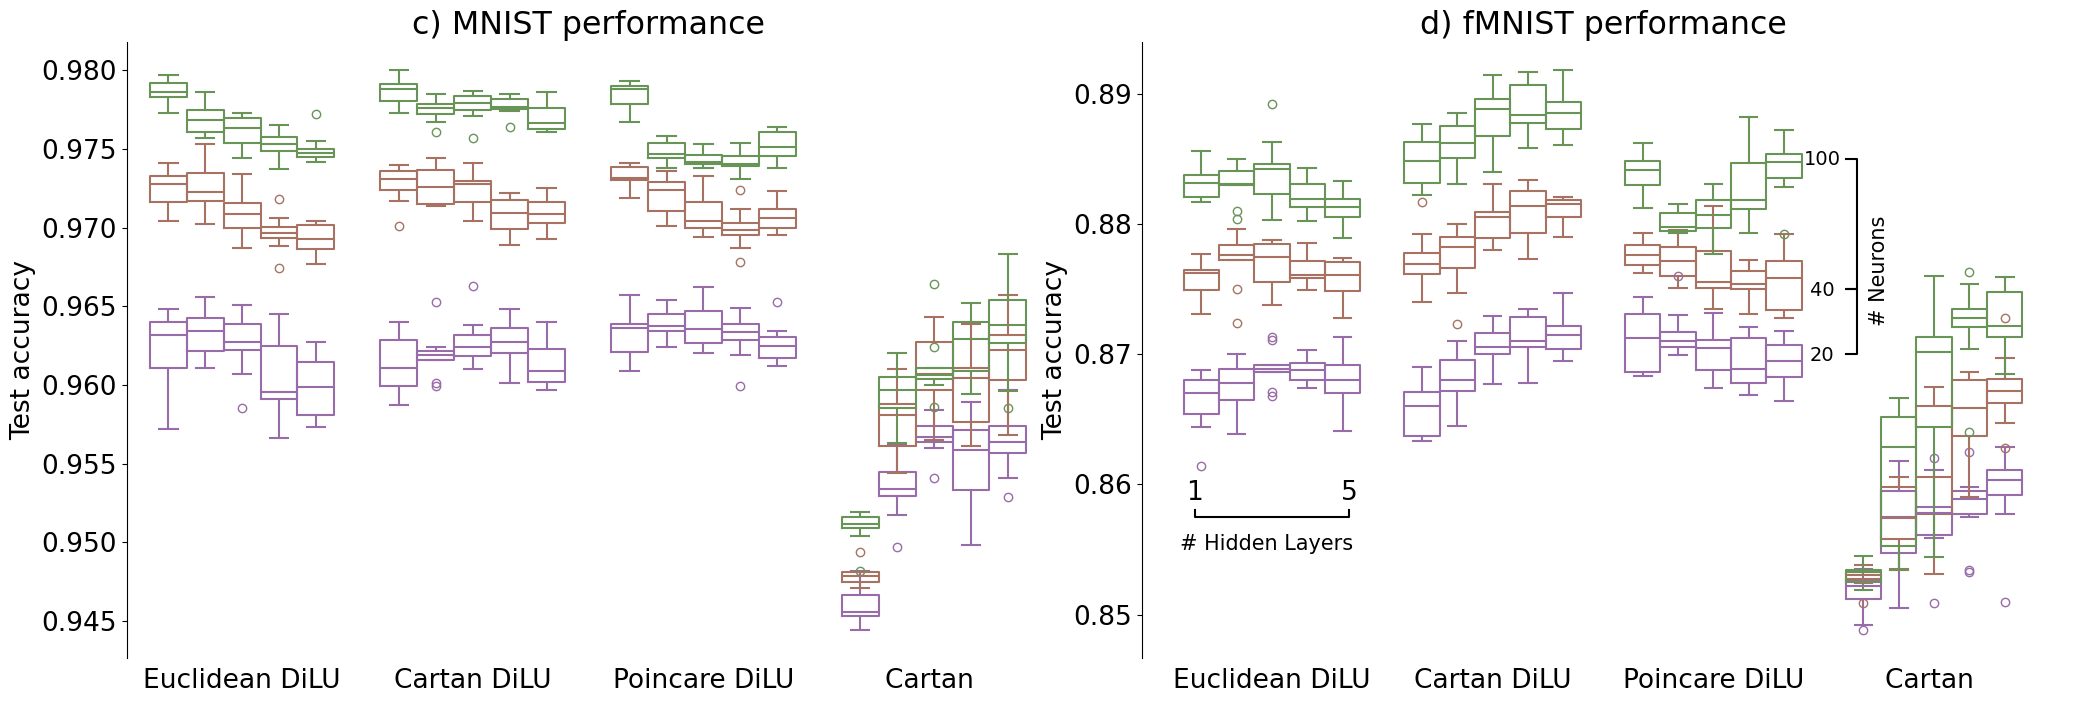

<Figure size 1500x750 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(25,8), gridspec_kw={'wspace': 0.1})

_, _ = mnistplot(ax1)
_, _ = fmnistplot(ax2)


ylim = ax1.get_ylim()

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()


fig.savefig('images/supplementary_comparison.svg', format='svg', dpi = 500, bbox_inches='tight')
fig.savefig('images/supplementary_comparison.jpeg', format='jpeg', dpi = 500, bbox_inches='tight')

/tmp/ipykernel_873745/3851555544.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Model'] + '_' + df['Activation']
/tmp/ipykernel_873745/3851555544.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].apply(lambda x: ' '.join(x.split('_')))
/tmp/ipykernel_873745/3851555544.py:20: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep cur

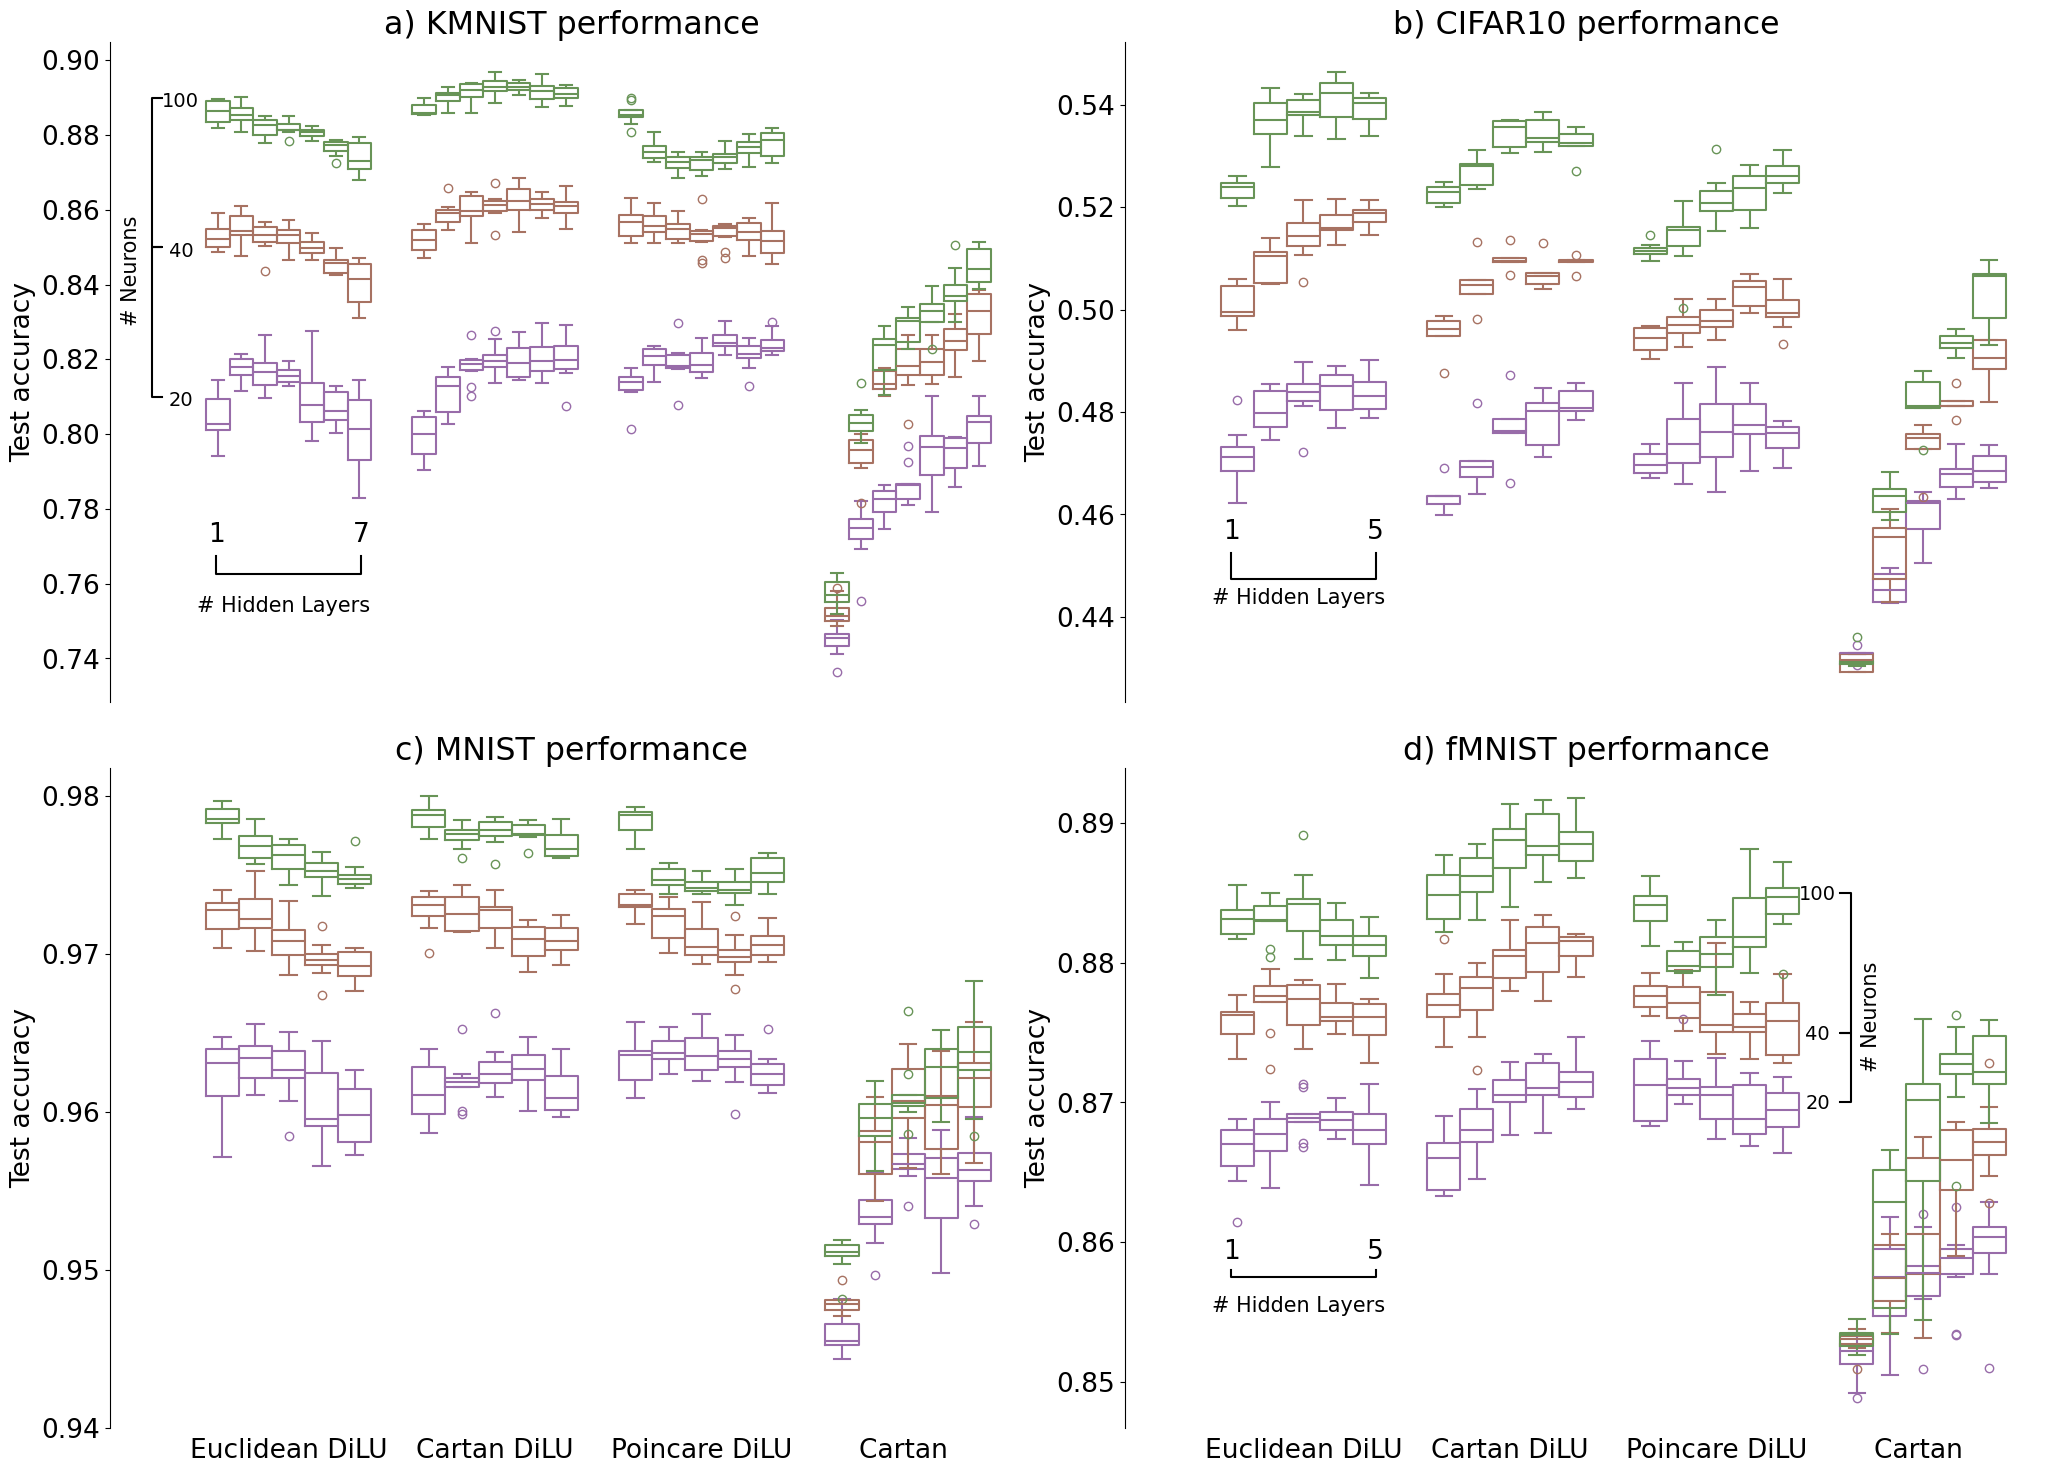

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 2, sharey=False, sharex=True, figsize=(25,18), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

_, _= kmnistplot(axes[0][0])
_, _= cifarplot(axes[0][1])
t1, t2 = mnistplot(axes[1][0])
_, _= fmnistplot(axes[1][1])

axes[1][0].set_yticks(t1[::2], [x[:-1] for x in t2[::2]])


ylim = ax1.get_ylim()

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()


fig.savefig('images/comparison_all.svg', format='svg', dpi = 500, bbox_inches='tight')
fig.savefig('images/comparison_all.jpeg', format='jpeg', dpi = 500, bbox_inches='tight')